In [1]:
# required libraries
!pip install diffusers transformers accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 198.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 121.3 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionPipeline
import torch

In [3]:
# Load the Stable Diffusion model
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  nce

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### Inference on a random prompt

  0%|          | 0/50 [00:00<?, ?it/s]

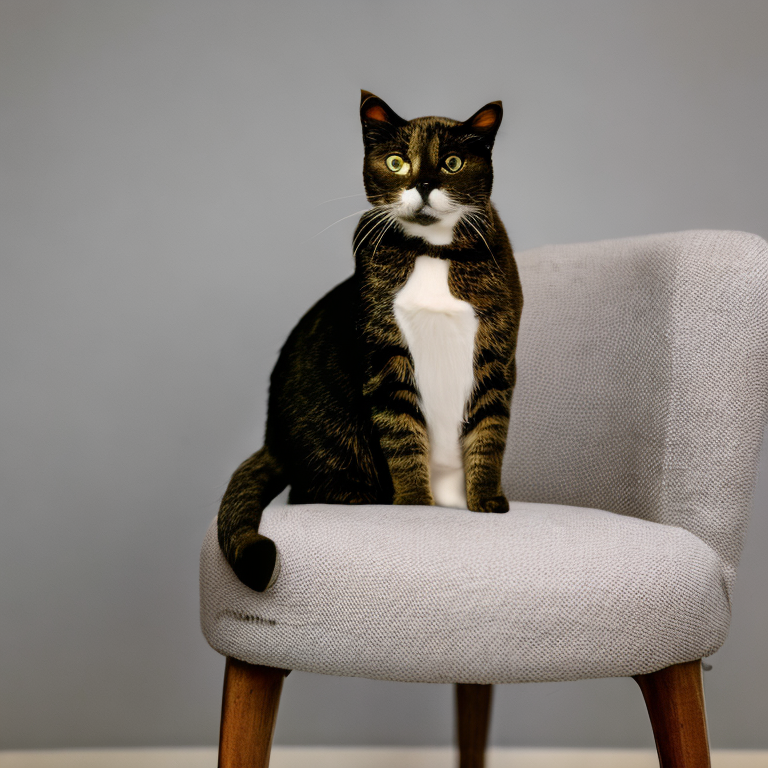

In [5]:
# Example caption 
caption = "a cat sitting over a chair"

# Generate an image
image = pipe(caption).images[0]

image.save("generated_image.png")
image.show()

### Testing on one of the prompts generated by Task 1

  0%|          | 0/50 [00:00<?, ?it/s]

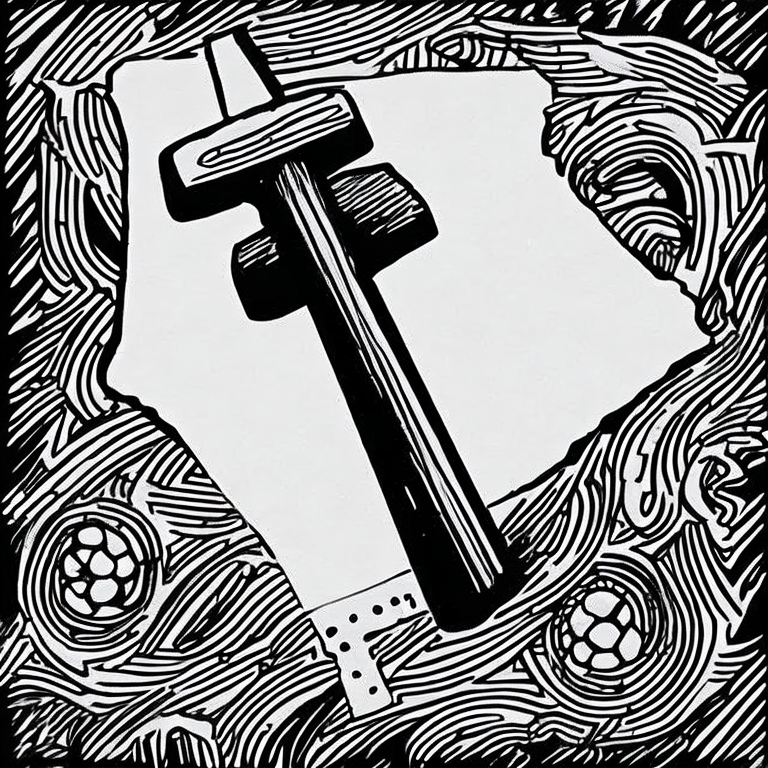

In [6]:
caption = "a black and white drawing of a hammer"

image = pipe(caption).images[0]

image.save("generated_image_1.png")
image.show()

### Extracting the outputs of task 1

All photos from the dataset in unzip in the terminal 

In [10]:
import json

with open('blip2_unprompted_filtered_data_.txt', 'r') as file:
    data = json.load(file)

# Define the prefix to remove
prefix = "/content/drive/MyDrive/CV_project/Task 1/"

data['image_paths'] = [path.replace(prefix, '') for path in data['image_paths']]

# Write the modified data 
with open('blip2_unprompted_filtered_data_.txt', 'w') as file:
    json.dump(data, file, indent=4)

### Now using the generated prompts from Task 1 to compare with the one created in task 2

In [12]:
!pip install matplotlib scikit-image pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 232.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 234.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 257.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 222.2 MB/s eta 0:00:00


In [15]:
!python compare_images.py

Loading pipeline components...: 100%|█████████████| 6/6 [00:28<00:00,  4.81s/it]
Processing 1/100: a black and white drawing of a hammer
100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 21.23it/s]
Figure(1000x500)
SSIM Score: 0.3639
Processing 2/100: a drawing of a shirt with a leaf on it
100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 23.38it/s]
Figure(1000x500)
SSIM Score: 0.4279
Processing 3/100: a drawing of a bug with a black outline
100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 23.33it/s]
Figure(1000x500)
SSIM Score: 0.2316
Processing 4/100: a drawing of a frog on a white background
100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 23.27it/s]
Figure(1000x500)
SSIM Score: 0.1008
Processing 5/100: a drawing of a tall building with a ladder
100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 23.33it/s]
Figure(1000x500)
SSIM Score: 0.1685
Processing 6/100: a rhino is standing in a

### Using ControlNet for making a controllable Image generation

#### In this step, we are using the ground sketch from the dataset using the text description generated from the Task 1 and comparing with the generated image and ground truth sketch image

In [40]:
!pip install diffusers transformers accelerate torch torchvision xformers controlnet_aux

INFO: pip is looking at multiple versions of xformers to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 121.3 MB/s eta 0:00:00


In [41]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [43]:
# Load ControlNet (canny) model
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
)

# Load Stable Diffusion + ControlNet pipeline
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
).to("cuda")

# pipe.enable_xformers_memory_efficient_attention()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

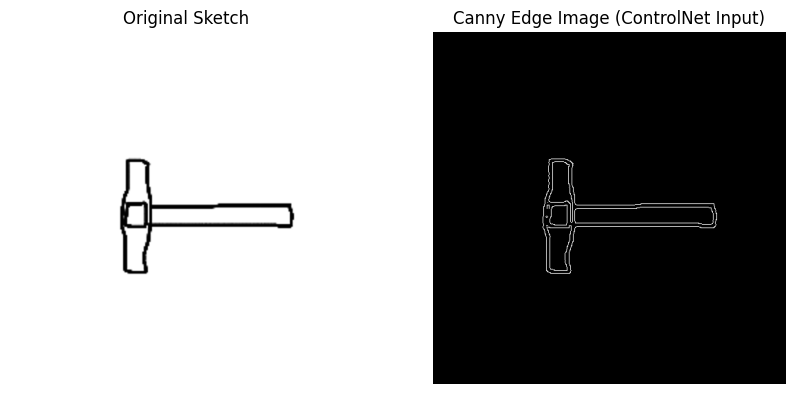

In [44]:
from controlnet_aux import CannyDetector

# Initialize
canny_detector = CannyDetector()

sketch_image = Image.open("all_photos/n03481172_17227-6.png").convert("RGB")

sketch_image = sketch_image.resize((512, 512))

# Apply Canny edge detection
canny_image = canny_detector(sketch_image)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(sketch_image)
ax[0].set_title("Original Sketch")
ax[0].axis("off")

ax[1].imshow(canny_image, cmap="gray")
ax[1].set_title("Canny Edge Image (ControlNet Input)")
ax[1].axis("off")
plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

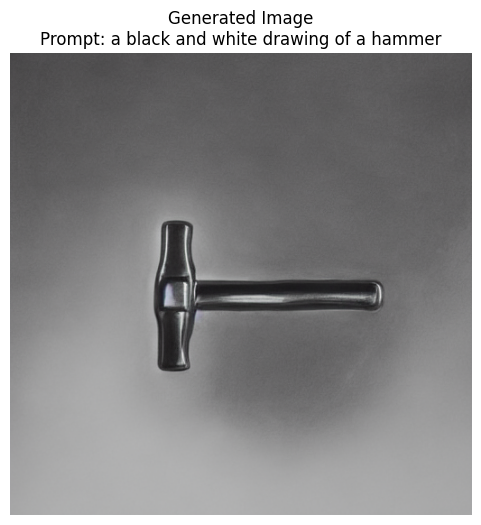

In [45]:
caption = "a black and white drawing of a hammer"

# Generate image using caption + canny edge image
output = pipe(
    prompt=caption,
    negative_prompt="low quality, bad anatomy, distorted", #This bascially acts as counteractive to help in the generation of image
    num_inference_steps=30,
    guidance_scale=7.5,
    image=canny_image
)

generated_image = output.images[0]

# Display generated image
plt.figure(figsize=(6,6))
plt.imshow(generated_image)
plt.title(f"Generated Image\nPrompt: {caption}")
plt.axis('off')
plt.show()